<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание Pro**


Напишите кластеризацию данных с помощью генетических алгоритмов. Создайте три класса двумерных точек, выберите центры классов на достаточном расстоянии и сгенерируйте точки с разбросом так, чтобы классы не пересекались.

Нужно расставить индексы точек, определить, к какому классу относится какая точка с помощью генетического алгоритма. В результате каждый класс должен состоять из точек одного и того же индекса.

Визуализируйте процесс обучения и итоговый результат.

In [ ]:
# загрузка библиотек
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

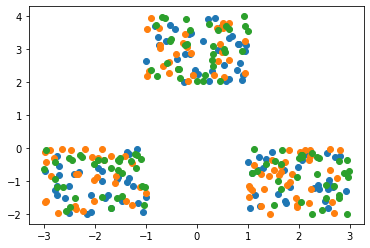

In [ ]:
# центры классов
center = [[0, 3], [2, -1], [-2, -1]]
# список для координат точек
data = []
# количество точек в каждом классе
n = 100
# сформируем точки
for i in range(3):
    for j in range(n):
        x = [center[i][0] + random.uniform(-1, 1), center[i][1] + random.uniform(-1,1)]
        data.append(x)
# перемешаем координаты и сохраним в массив numpy
random.shuffle(data)
data = np.array(data)
# нарисуем картинку
# рисуем точки одного класса
plt.scatter(data[:n,0], data[:n, 1])
# рисуем точки другого класса другим цветом
plt.scatter(data[n:n*2,0], data[n:n*2, 1])
# рисуем точки третьего класса другим цветом
plt.scatter(data[2*n:,0], data[n*2:, 1])
plt.show()

In [ ]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    newpopul = [] # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse) # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv): # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i]) # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index]) # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(
        curr_popul,
        nsurv
        ):   
    indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1) # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1] # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2] # Получаем второго бота-родителя по indexp2    
    return botp1, botp2 # Возвращаем обоих полученных ботов

'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''
def crossPointFrom2Parents(
        botp1,
        botp2, 
        j
        ):
    pindex = random.random() # Получаем случайное число в диапазоне от 0 до 1
    
    # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x # Возвращаем значение бота

    ---------- 0 ----------


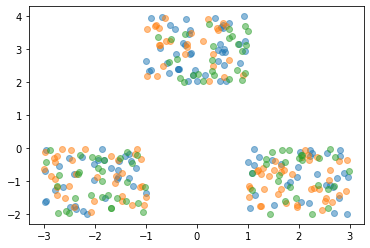


    ---------- 20 ----------


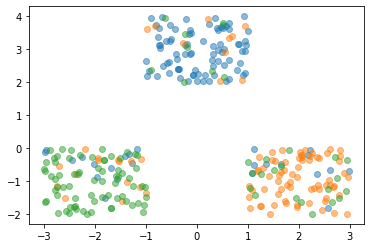


    ---------- 40 ----------


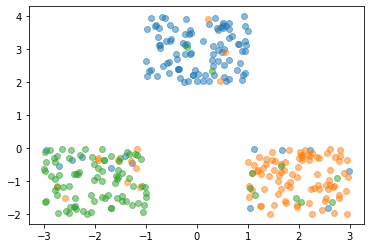


    ---------- 60 ----------


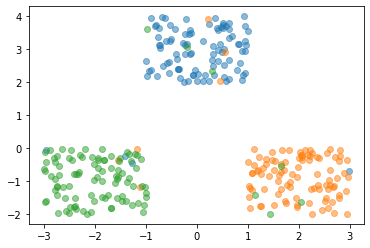


    ---------- 80 ----------


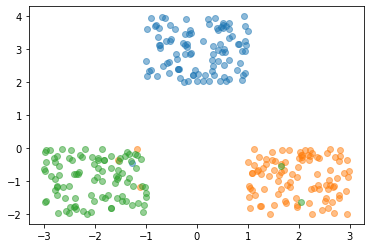


    ---------- 100 ----------


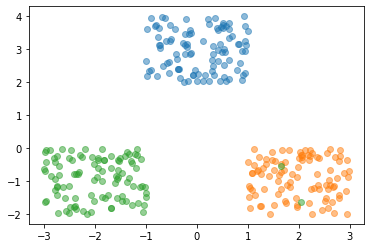


    ---------- 120 ----------


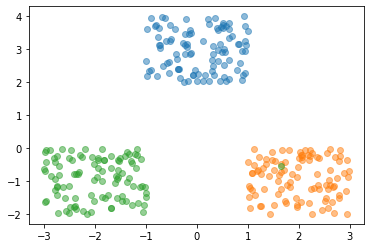


    ---------- 140 ----------


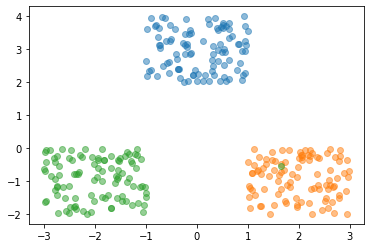


    ---------- 160 ----------


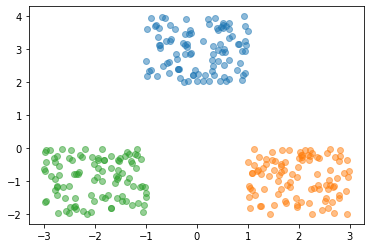


    ---------- 180 ----------


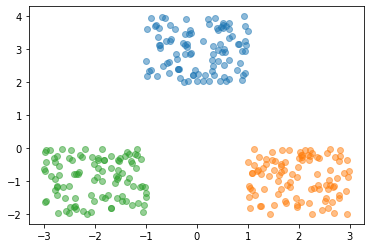


    ---------- 199 ----------


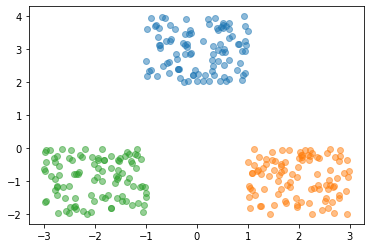

In [ ]:
# Общее число ботов
q = 100
# Количество выживших
nsurv = 20
# Количество новых ботов
nnew = q-nsurv
# количество эпох
epohs = 200
# коэфициент мутаций
mut = 0.01

# Длина бота(количество точек) (Каждый компонент указывает индекс точки, к какому классу относится каждая точка)
l = 300 

# Двумерный массив популяции, размерностью [q, l]
popul = []

# Проходим по всей длине популяции
for i in range(q):
    # Создаем пустого бота
    popul.append([])
    # Проходим по всей длине бота
    for j in range(l):        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до 2
        popul[i].append(random.randint(0, 2))

# Проходим по всем эпохам
for it in range(epohs):
    # Создаем пустой список для значений ботов
    val = []
    # Проходим по всей популяции
    for i in range(q):
        # Берем очередного бота
        bot = popul[i]
        # Проходим по всей длине бота
        # Обнуляем ошибку i-го бота
        f = 0
        for j in range(l):
            # ошибку будем считать евклидовым расстоянием от точки до центра нужного класса 
            x = data[j][0] - center[bot[j]][0]
            y = data[j][1] - center[bot[j]][1]
            evklid_dist = (x**2 + y**2)**0.5
            f += evklid_dist
        val.append(f) # Добавляем в val значение ошибки для i-го бота
            
    # Получаем новую популяцию и сортированный список значений
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
        
    # Проходимся в цикле nnew-раз
    for i in range(nnew):
        # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        botp1, botp2 = getParents(newpopul, nsurv)
         # Массив для нового бота
        newbot = []
    
        # Проходим по всей длине бота
        for j in range(l):
            # Получаем значение для j-ого компонента бота
            x = crossPointFrom2Parents(botp1, botp2, j)
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, 2)
            # Добавляем новое значение в бота         
            newbot.append(x)
        # Добавляем бота в новую популяцию
        newpopul.append(newbot)
    # Записываем в popul новую посчитанную популяцию
    popul = newpopul

    # выводим графики лучшего бота через каждые 20 эпох
    if it%20 == 0 or it == 199:
        print('    ----------', it, '----------')
        bot = np.array(popul[0])
        for i in range(3):
            bot_data = data[bot==i, :]
            plt.scatter(bot_data[:,0], bot_data[:,1], alpha=0.5)
        plt.show()
        print()